# Figures

This Jupyter notebook (Python 3 kernel) generates some of the figures presented in the manuscript.

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as mlines
import matplotlib.patches as patches
import matplotlib.cm as cm

# additional imports
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
from netCDF4 import Dataset

## Shorelines

In [2]:
LiMW = Dataset('../Input/LiMW_3600_1800.nc')
LiMW_Band1 = LiMW.variables['Band1'][:,:].data
LiMW_Band1[LiMW_Band1>6] = 0

LiMW_lat = LiMW.variables['lat'][:].data
LiMW_lon = LiMW.variables['lon'][:].data

In [3]:
def make_map():
    lat = LiMW_lat
    lon = LiMW_lon
    z = LiMW_Band1
    projection=ccrs.PlateCarree()
    coastlines=False

    # wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    # set up the figure
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,1,1, projection=projection)
    if coastlines:
        ax.coastlines()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 color='gray', alpha=0.5, linestyle='--')

    # set up the discrete colormap
    cmap = colors.ListedColormap(['gainsboro',
                                  'mediumseagreen',
                                  'pink',
                                  'darkorange',
                                  'orangered',
                                  'dodgerblue',
                                  'C7'])
    bounds = np.arange(-0.5,7.5,1)
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # plot the data
    # im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    # im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    fname = '../Input/Shorelines/Simplified_Shorelines_15Ma.shp'
    shorelines_15Ma = ShapelyFeature(Reader(fname).geometries(),
                                    ccrs.PlateCarree(), facecolor='none', edgecolor='black',linestyle='--')
    ax.add_feature(shorelines_15Ma,label='15 Ma shorelines')

    fname = '../Input/Shorelines/Simplified_Shorelines_5Ma.shp'
    shorelines_5Ma = ShapelyFeature(Reader(fname).geometries(),
                                    ccrs.PlateCarree(), facecolor='none', edgecolor='black',linestyle=':')
    ax.add_feature(shorelines_5Ma,label='5 Ma shorelines')

    dashed_line = mlines.Line2D([], [], color='black', linestyle='--')
    solid_line = mlines.Line2D([], [], color='black', linestyle=':')
    plt.legend(handles=[dashed_line,solid_line],labels=['15 Ma shoreline','5 Ma shoreline'])

    # add the colorbar
    # cbar = fig.colorbar(im, ax=ax)
    # cbar.set_ticks(np.arange(7))
    # cbar.set_ticklabels(['0 = water/ice',
    #                      '1 = metamorphics',
    #                      '2 = felsics',
    #                      '3 = intermediates',
    #                      '4 = mafics',
    #                      '5 = carbonates',
    #                      '6 = sediments'])

    extent = [90, 160, -10, 10]
    ax.set_extent(extent)

In [4]:
cmap = colors.ListedColormap(['gainsboro',
                              'mediumseagreen',
                              'pink',
                              'darkorange',
                              'orangered',
                              'dodgerblue',
                              'C7'])
bounds = np.arange(-0.5,7.5,1)
norm = colors.BoundaryNorm(bounds, cmap.N)

In [5]:
def plot_lithology(lith_mask, lat, lon, projection=ccrs.PlateCarree(), gridlines=False, coastlines=False, output=False):
    """
    Plot lithology data.

    Parameters
    ----------
    lith_mask : array
        the lithological mask (unsnaked)
        
    lat : array
        of latitude
        
    lon : array
        of longitude
        
    projection : cartopy projection
        as ccrs.XXX()
      
    coastlines : boolean
        set whether coastlines will be drawn (default False)
        
    output : boolean
        if true, return the figure and axis handles (default False)
    """
    z = lith_mask
    
    # wrap the longitude vector around an arbitary point in order to fix non-plotting issue on date line
    wrapped_lon = np.concatenate([lon[5:],lon[:5]])
    wrapped_z = np.concatenate([z[:,5:],z[:,:5]],1)

    # set up the figure
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,1,1, projection=projection)
    if coastlines:
        ax.coastlines()
    if gridlines:
        ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                     color='gray', alpha=0.5, linestyle='--')

    # set up the discrete colormap
    cmap = colors.ListedColormap(['gainsboro',
                                  'mediumseagreen',
                                  'pink',
                                  'darkorange',
                                  'orangered',
                                  'dodgerblue',
                                  'C7'])
    bounds = np.arange(-0.5,7.5,1)
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # plot the data
    im = ax.pcolormesh(wrapped_lon, lat, wrapped_z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
    
    # add the colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_ticks(np.arange(7))
    cbar.set_ticklabels(['0 = water/ice',
                         '1 = metamorphics',
                         '2 = felsics',
                         '3 = intermediates',
                         '4 = mafics',
                         '5 = carbonates',
                         '6 = sediments'])

    if output!=False:
        return fig, ax

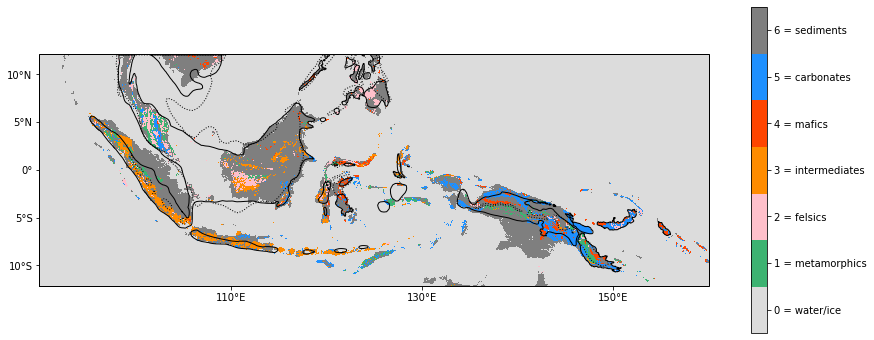

In [6]:
fig, ax = plot_lithology(LiMW_Band1, LiMW_lat, LiMW_lon,
                         coastlines=False, output=True)

extent = [90, 160, -10, 10]
ax.set_extent(extent)

fname = '../Input/Shorelines/Simplified_Shorelines_15Ma.shp'
shorelines_15Ma = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor='black',linestyle=':')
ax.add_feature(shorelines_15Ma,label='15 Ma shorelines',zorder=1001)

fname = '../Input/Shorelines/Simplified_Shorelines_5Ma.shp'
shorelines_5Ma = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor='black',linestyle='-')
ax.add_feature(shorelines_5Ma,label='5 Ma shorelines',zorder=1000)

ax.set_xticks([110, 130, 150], crs=ccrs.PlateCarree())
ax.set_yticks([-10, -5, 0, 5, 10], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# dashed_line = mlines.Line2D([], [], color='black', linestyle=':')
# solid_line = mlines.Line2D([], [], color='black', linestyle='-')
# ax.legend(handles=[dashed_line,solid_line],labels=['15 Ma shoreline','5 Ma shoreline'])
plt.show()

In [7]:
oxygen_data = pd.read_excel('../Input/2008CompilationData.xls')
shoreline_data = pd.read_excel('../Input/Shoreline_Summary.xlsx')
shoreline_data

,Age,Halmahera_Area,Sulawesi_Area,Phillipines_Area,New_Guinea_Area,Java_Sumatra_Area,Sum_no_Sunda
0,20,423,52946,146587,34593,26235,260784
1,15,0,37736,163951,84635,26235,312557
2,10,2055,60100,176649,278083,137347,654234
3,5,53367,58184,200806,431083,336394,1079834
4,0,67770,184961,262316,885803,705020,2105870


In [8]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='none',
                                        facecolor='lightgrey')

/Users/yuempark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


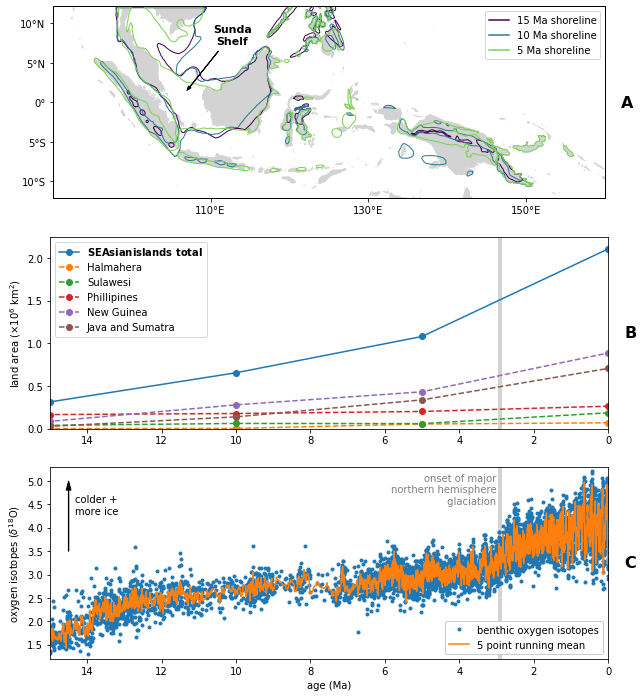

In [9]:
plt.figure(figsize=(10,12))

## SHORELINES ##

ax0 = plt.subplot(3,1,1, projection=ccrs.PlateCarree())

#ax0.pcolormesh(LiMW_lon, LiMW_lat, LiMW_Band1, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

cmap = cm.get_cmap('viridis')
color_15 = cmap(0.0)
color_10 = cmap(0.4)
color_5 = cmap(0.8)

fname = '../Input/Shorelines/Simplified_Shorelines_15Ma.shp'
shorelines_15Ma = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor=color_15,linestyle='-')
ax0.add_feature(shorelines_15Ma,label='15 Ma shorelines')
fname = '../Input/Shorelines/Simplified_Shorelines_10Ma.shp'
shorelines_10Ma = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor=color_10,linestyle='-')
ax0.add_feature(shorelines_10Ma,label='10 Ma shorelines')
fname = '../Input/Shorelines/Simplified_Shorelines_5Ma.shp'
shorelines_5Ma = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor=color_5,linestyle='-')
ax0.add_feature(shorelines_5Ma,label='5 Ma shorelines')
ax0.add_feature(land_50m,zorder=-1)


ax0.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
             color='gray', alpha=0.5, linestyle='--',zorder=-100)
ax0.set_xticks([110, 130, 150], crs=ccrs.PlateCarree())
ax0.set_yticks([-10, -5, 0, 5, 10], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.yaxis.set_major_formatter(lat_formatter)
extent = [90, 160, -10, 10]
ax0.set_extent(extent)
line_15Ma = mlines.Line2D([], [], color=color_15, linestyle='-')
line_10Ma = mlines.Line2D([], [], color=color_10, linestyle='-')
line_5Ma = mlines.Line2D([], [], color=color_5, linestyle='-')
plt.legend(handles=[line_15Ma,line_10Ma,line_5Ma],
           labels=['15 Ma shoreline','10 Ma shoreline','5 Ma shoreline'])

ax0.arrow(111,6.5,-4,-5,
          shape='full', width=0.01, head_width=0.4, fc='k', length_includes_head=True)
ax0.text(0.325, 0.85, 'Sunda\nShelf', fontsize=11, fontweight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax0.transAxes)

#ax0.arrow(142,0.5,-1.5,-2.5,
#          shape='full', width=0.01, head_width=0.4, fc='k', length_includes_head=True)
#ax0.text(0.75, 0.57, 'New Guinea', fontsize=11, fontweight='bold',
#         horizontalalignment='center', verticalalignment='center', transform=ax0.transAxes)

## ISOTOPES ##

ax1 = plt.subplot(3,1,3)
rolling_mean = oxygen_data['d18O adj.*'].rolling(window=5).mean()
plt.plot(oxygen_data['Age (Ma)'],oxygen_data['d18O adj.*'],'.',label='benthic oxygen isotopes')
plt.plot(oxygen_data['Age (Ma)'],rolling_mean,'-',label='5 point running mean')
#onset of major Northern Hemisphere Glaciation (NHG), circa 2.85–2.73 Ma, when large ice sheets 
#developed across Greenland, Eurasia, and Northern America [Raymo, 1994; Maslin et al., 1996; Hidy et al., 2013]
rect = patches.Rectangle((2.85,1),.12,5,linewidth=1,edgecolor='none',facecolor='lightgrey')
ax1.add_patch(rect)
plt.text(3,4.5,'onset of major\nnorthern hemisphere\n glaciation',horizontalalignment='right',color='grey')
plt.xlim(15,0)
plt.legend(loc='lower right', framealpha=1)
plt.ylim(1.2,5.3)
plt.ylabel('oxygen isotopes ($\delta^{18}$O)')
plt.xlabel('age (Ma)')
ax1.arrow(14.5,3.5,0,1.5,
          shape='full', width=0.01, head_width=0.13, fc='k', length_includes_head=True)
ax1.text(0.045, 0.8, 'colder +\nmore ice',
         horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes)

## AREA ##
ax2 = plt.subplot(3,1,2)
plt.plot(shoreline_data.Age,shoreline_data.Sum_no_Sunda/1e6,'o-',label=r'$\bf{SE Asian islands\ total}$')
plt.plot(shoreline_data.Age,shoreline_data.Halmahera_Area/1e6,'o--',label='Halmahera')
plt.plot(shoreline_data.Age,shoreline_data.Sulawesi_Area/1e6,'o--',label='Sulawesi')
plt.plot(shoreline_data.Age,shoreline_data.Phillipines_Area/1e6,'o--',label='Phillipines')
plt.plot(shoreline_data.Age,shoreline_data.New_Guinea_Area/1e6,'o--',label='New Guinea')
plt.plot(shoreline_data.Age,shoreline_data.Java_Sumatra_Area/1e6,'o--',label='Java and Sumatra')
rect = patches.Rectangle((2.85,0),.12,3000000/1e6,linewidth=1,edgecolor='none',facecolor='lightgrey')
ax2.add_patch(rect)
plt.ylabel('land area ($\\times$10$^{6}$ km$^2$)')
plt.legend()
plt.xlim(15,0)
plt.ylim(0,2.25)
ax2.set_yticks(np.arange(0,2.25,0.5))
#ax2.get_xaxis().set_ticklabels([])

ax0.text(1.04, 0.5, 'A', fontsize=16, fontweight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax0.transAxes)
ax1.text(1.04, 0.5, 'C', fontsize=16, fontweight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(1.04, 0.5, 'B', fontsize=16, fontweight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

plt.tight_layout()
plt.savefig('../../Manuscript/Figures/shoreline_growth.pdf',bbox_inches='tight')
plt.show()

## Lithology

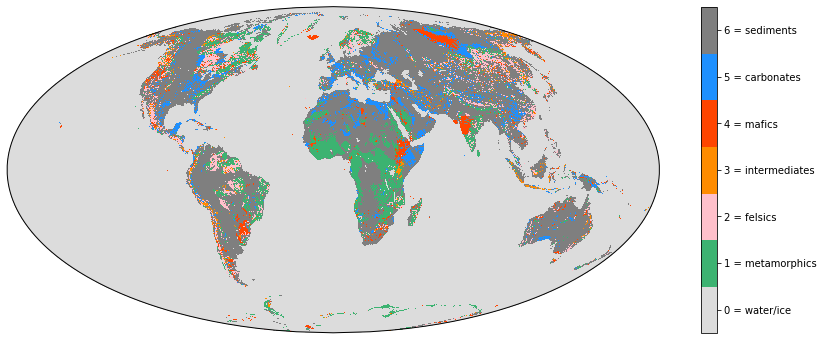

In [10]:
fig, ax = plot_lithology(LiMW_Band1, LiMW_lat, LiMW_lon, projection=ccrs.Mollweide(),
                         coastlines=False, output=True)

plt.savefig('../../Manuscript/Figures/world_lithology.jpg', bbox_inches='tight', dpi=300)
plt.show(fig)

## Scenarios

In [11]:
default = Dataset('../Output/lith_mask_360_720.nc')
noIA = Dataset('../Output/lith_mask_noIA.nc')
redIA = Dataset('../Output/lith_mask_redIA.nc')
redIA10 = Dataset('../Output/lith_mask_redIA10.nc')
redIA5 = Dataset('../Output/lith_mask_redIA5.nc')
redIAsunda = Dataset('../Output/lith_mask_redIAsunda.nc')
redIAsunda10 = Dataset('../Output/lith_mask_redIAsunda10.nc')
redIAsunda5 = Dataset('../Output/lith_mask_redIAsunda5.nc')
noDeccan = Dataset('../Output/lith_mask_noDeccan.nc')
noET = Dataset('../Output/lith_mask_noET.nc')
noTraps = Dataset('../Output/lith_mask_noTraps.nc')

In [12]:
lat = default.variables['lat'][:].data
lon = default.variables['lon'][:].data

default_frac = default.variables['frac'][:,:,:].data
noIA_frac = noIA.variables['frac'][:,:,:].data
redIA_frac = redIA.variables['frac'][:,:,:].data
redIA10_frac = redIA10.variables['frac'][:,:,:].data
redIA5_frac = redIA5.variables['frac'][:,:,:].data
redIAsunda_frac = redIAsunda.variables['frac'][:,:,:].data
redIAsunda10_frac = redIAsunda10.variables['frac'][:,:,:].data
redIAsunda5_frac = redIAsunda5.variables['frac'][:,:,:].data
noDeccan_frac = noDeccan.variables['frac'][:,:,:].data
noET_frac = noET.variables['frac'][:,:,:].data
noTraps_frac = noTraps.variables['frac'][:,:,:].data

In [13]:
lith_class = ['0 = water/ice',
              '1 = metamorphics',
              '2 = felsics',
              '3 = intermediates',
              '4 = mafics',
              '5 = carbonates',
              '6 = sediments']

def frac_column_plot(frac, title, this_col, total_col, xlim=None, ylim=None, coastlines=True):
    
    for i in range(7):
        
        ax = plt.subplot(7, total_col , this_col+(i*total_col), projection=ccrs.PlateCarree())
        
        z = frac[i,:,:]
        im = ax.pcolormesh(lon, lat, z, transform=ccrs.PlateCarree(), cmap='Reds')
        
        if coastlines:
            ax.coastlines(lw=0.25)
            
        if xlim!=None:
            ax.set_xlim(xlim)
        if ylim!=None:
            ax.set_ylim(ylim)
            
        if (this_col+(i*total_col)) < 5:
            ax.set_title(title, fontweight='bold')
            
        if this_col==1:
            ax.text(-0.1, 0.5, lith_class[i], rotation=90,
                    horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            
    return im

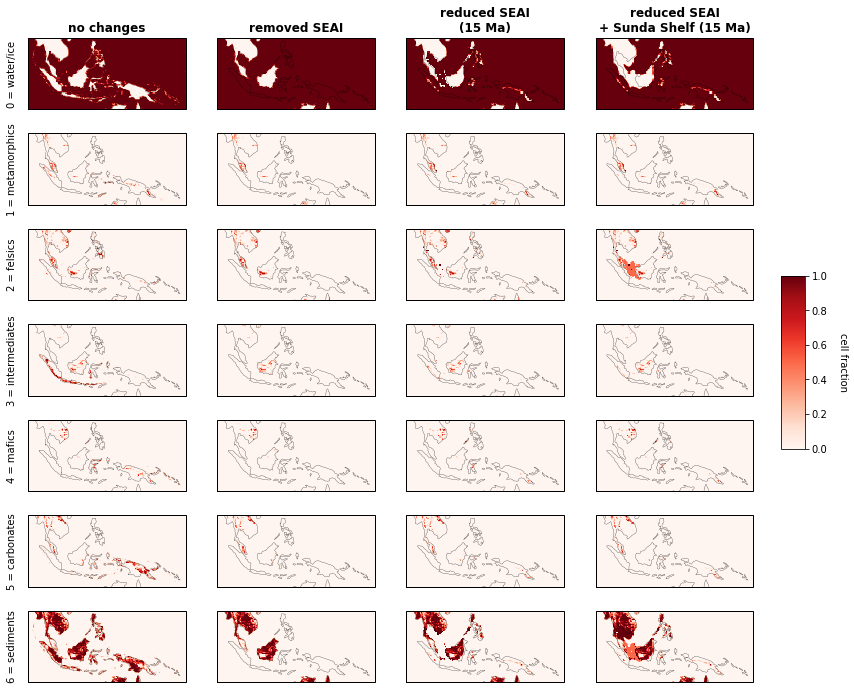

In [14]:
fig = plt.figure(figsize=(13,12))

xlim = (90,165)
ylim = (-14,20)

im = frac_column_plot(default_frac, 'no changes', 1, 4, xlim=xlim, ylim=ylim)
im = frac_column_plot(noIA_frac, 'removed SEAI', 2, 4, xlim=xlim, ylim=ylim)
im = frac_column_plot(redIA_frac, 'reduced SEAI\n(15 Ma)', 3, 4, xlim=xlim, ylim=ylim)
im = frac_column_plot(redIAsunda_frac, 'reduced SEAI\n+ Sunda Shelf (15 Ma)', 4, 4, xlim=xlim, ylim=ylim)

cax = fig.add_axes([0.93, 0.4, 0.025, 0.2])
fig.colorbar(im, cax=cax)
cax.set_ylabel('cell fraction', rotation=270, labelpad=20)

plt.savefig('../../Manuscript/Figures/ING_fracs.jpg', bbox_inches='tight', dpi=300)
plt.show(fig)